In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import random as rd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate
from sklearn.preprocessing import StandardScaler
from  sklearn.linear_model import Lasso

import hyperopt
from hyperopt import fmin, tpe, Trials, hp

In [25]:
#Yo tengo un modelo parametrico que quiero evaluar en mis datos
#    param_grid = {'alpha':param_alpha}

def predicciones(alpha):
    
    model = Lasso(alpha = alpha, max_iter = 10**5)
    model.fit(X_train_scaled, y_train)

    return model.predict(X_test_scaled)

#Tengo que definir una métrica
def fn_objetivo(alpha):
    error =  y_test - predicciones(alpha)
    error_cuadratico_medio = (error**2).mean()
    
    return error_cuadratico_medio

#Extraer los resultados de la optimizacion bayesiana
def get_evaluation_point(current_trial):
    return current_trial['misc']['vals']['alpha'][0], current_trial['result']['loss']

# Vamos a repetir lo que hicimos con el grid search pero de forma bayesiana

In [26]:
#Genero la data
num_data_points = 100
white_noise_points = 100

X = np.linspace(0,10,num_data_points) #+ rd.normal(size = num_data_points)
y = np.linspace(0,10,num_data_points) + 2*rd.normal(size = num_data_points)

In [27]:
#Agrego el ruido blanco
X_model = X.reshape(-1,1)
X_white_noise = rd.random(size = (num_data_points,white_noise_points))
X = np.hstack([X_model,X_white_noise])

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
#Escalo mis datos para regularizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [29]:
max_evals = 1000

# define a search space
space = hp.loguniform('alpha',-8,3)

trials = Trials()

# minimize the objective over the space
best = fmin(fn_objetivo, space, algo=tpe.suggest, max_evals=max_evals, trials = trials)
print(hyperopt.space_eval(space, best))

100%|██████████| 1000/1000 [00:05<00:00, 190.55trial/s, best loss: 5.140949665674079]
0.5150941108132661


# Evaluar los resultados

In [30]:
list_x_evaluations = []
list_y_evaluations = []

for current_trial in (trials.trials):
        current_x, current_y  = get_evaluation_point(current_trial)
        list_x_evaluations.append(current_x)
        list_y_evaluations.append(current_y)

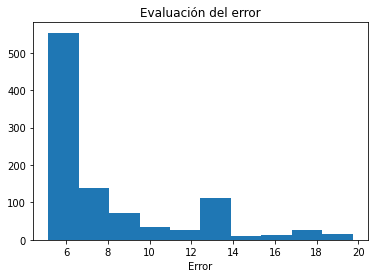

In [31]:
#El va a estar dando vueltas mas tiempo en donde es mejor
plt.hist(np.array(list_y_evaluations))
plt.title('Evaluación del error')
plt.xlabel('Error')
plt.show()

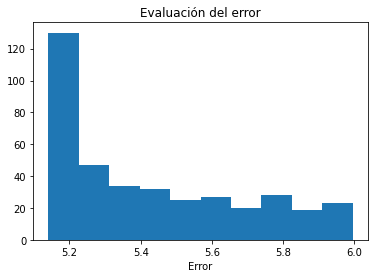

In [32]:
plt.hist(np.array(list_y_evaluations)[np.array(list_y_evaluations) < 6])
plt.title('Evaluación del error')
plt.xlabel('Error')
plt.show()

# Evaluación de donde él está buscando el mejor parámetro

In [34]:
altura, posicion = np.histogram(np.log(np.array(list_x_evaluations, dtype = 'float')))
posicion = (posicion[1:] + posicion[:-1]) / 2

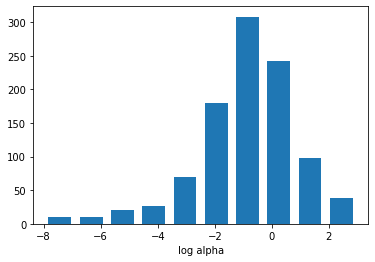

In [35]:
plt.bar(posicion, altura)
plt.xlabel('log alpha')
plt.show()

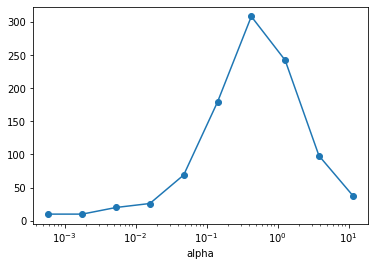

In [36]:
plt.plot(np.exp(posicion), altura, '-o')
plt.xlabel('alpha')
plt.xscale('log')
plt.show()

In [14]:
#El bar plot no funciona porque el ancho es siempre el mismo...
#plt.bar(np.exp(posicion), altura)
#plt.xlabel('log alpha')
#plt.xscale('log')
#plt.show()